# Wine Quality Classification

### Objective

The objective for this project is to classify the quality of wine based on its physicochemical properties.

### Dataset description
The dataset is called Wine Quality, which is found on the UCI Machine Learning Repository. The link to the dataset is [here](https://archive.ics.uci.edu/dataset/186/wine+quality).  
There are 11 features, all of them are continuous variables. The target variable is called `quality`

### Data preprocessing
All preprocessing steps done to the data is on `data-preprocessing.ipynb`

The raw dataset contains two csv files: one for red wine and the other for white wine. The first five rows of each file are shown below:

In [3]:
import pandas as pd

In [4]:
red_wine_raw = pd.read_csv("../data/raw/winequality-red.csv", delimiter=";")
red_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine_raw = pd.read_csv("../data/raw/winequality-white.csv", delimiter=";")
white_wine_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


The cleaned file is called `winequality_cleaned.csv`, located in `data/cleaned` directory. The first five rows of cleaned data are shown below:

In [6]:
cleaned = pd.read_csv("../data/cleaned/winequality_cleaned.csv")
cleaned.head()

,is_red_wine,alcohol,density,volatile acidity,chlorides,quality_label
0,1,9.4,0.9978,0.70,0.076,1
1,1,9.8,0.9968,0.88,0.098,1
2,1,9.8,0.9970,0.76,0.092,1
3,1,9.8,0.9980,0.28,0.075,0
4,1,9.4,0.9978,0.66,0.075,1


The cleaned dataset is split into training (`winequality_train.csv`) and testing (`winequality_test.csv`) datasets using a 80/20 split. 

### Model construction
The models chosen for this project are: Logistic regression, Support Vector Machine, Linear Discriminant Analysis, and Classification Decision Tree.  
All functions used to run the models above are in `model.py`

In [ ]:
%load_ext autoreload
%autoreload 2
import model

In [8]:
train = pd.read_csv("../data/cleaned/winequality_train.csv")
X_train = train.drop(columns="quality_label")
y_train = train["quality_label"]

test = pd.read_csv("../data/cleaned/winequality_test.csv")
X_test = test.drop(columns="quality_label")
y_test = test["quality_label"]

We first run each model without any tuning. For SVM, this means we are using cost = 1, gamma = 1, and degree = 2(for polynomial basis kernel)

In [9]:
model.run_logistic_regression(X_train, X_test, y_train, y_test)

Average cross-validation score: 0.74
Accuracy score: 0.73


In [10]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='linear')

Average cross-validation score: 0.74
Accuracy score: 0.73


In [11]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='rbf')

Average cross-validation score: 0.73
Accuracy score: 0.74


In [12]:
model.run_svm(X_train, X_test, y_train, y_test, kernel='poly')

Average cross-validation score: 0.74
Accuracy score: 0.74


In [13]:
model.run_lda(X_train, X_test, y_train, y_test)

Average cross-validation score: 0.74
Accuracy score: 0.74


#### Hyperparameter tuning
Rbf and polynomial kernal for SVM, as well as LDA show the best initial result.

In [21]:
search_rbf = model.tune_svm(X_train, y_train, kernel='rbf', c=[0.001, 0.01, 0.1, 1, 5, 10, 100], gamma=[0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4])

accuracy_score = search_rbf.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for rbf kernel: {'svm__gamma': 0.1, 'svm__C': 1}
Accuracy score: 0.7481203007518797


In [ ]:
search = model.tune_svm(X_train, y_train, kernel='poly', c=[0.1, 1, 5, 10, 100], gamma=[0.1, 1, 2, 3], degree=[2, 3])

test_score = search.score(X_test, y_test)
print("Accuracy score:", test_score)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.2s
[CV] END ............svm__C=5, svm__degree=2, svm__gamma=0.1; total time=   0.3s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  10.9s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  13.7s
[CV] END .............svm__C=10, svm__degree=2, svm__gamma=2; total time=  13.6s
[CV] END .............svm__C=10, svm__degree=2, svm__gamma=2; total time=  17.7s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  53.4s
[CV] END ..............svm__C=5, svm__degree=2, svm__gamma=3; total time=  53.6s
[CV] END ..........svm__C=0.1, svm__degree=3, sv

In [28]:
lda_tuned = model.tune_lda(X_train, y_train)

accuracy_score = lda_tuned.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Best parameters: {'lda__solver': 'svd'}
Accuracy score: 0.7387218045112782


In [17]:
tree = model.build_classification_tree(X_train, y_train)

accuracy_score = tree.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 6, 'criterion': 'entropy'}
Best CV score: 0.73
Accuracy score: 0.7321428571428571


In [22]:
from scipy.stats import loguniform

search_rbf_2 = model.tune_svm(X_train, y_train, kernel='rbf', c=loguniform(0.1, 10), gamma=loguniform(0.01, 1))

accuracy_score = search_rbf_2.score(X_test, y_test)
print("Accuracy score:", accuracy_score)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for rbf kernel: {'svm__C': np.float64(1.5930522616241019), 'svm__gamma': np.float64(0.2607024758370766)}
Accuracy score: 0.7528195488721805


### Result

#### Visualization

We first look at the learning curves for each model.

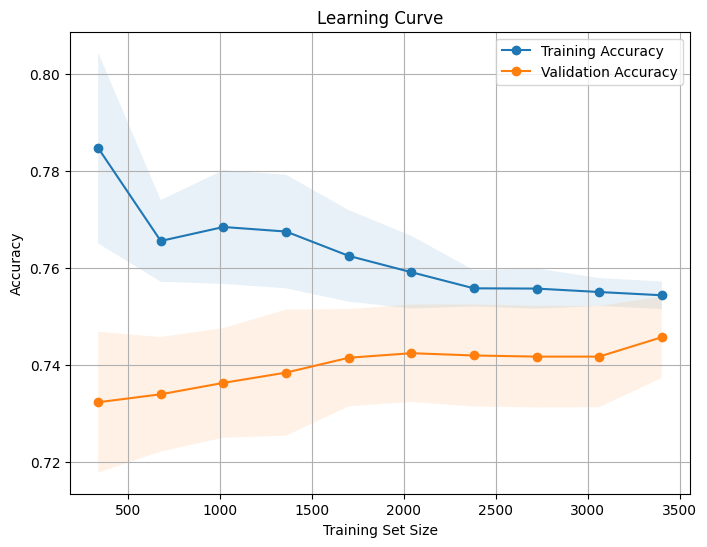

In [ ]:
model.plot_learning_curve(search_rbf_2, X_train, y_train, title="Learning Curve for SVM with rbf kernel")

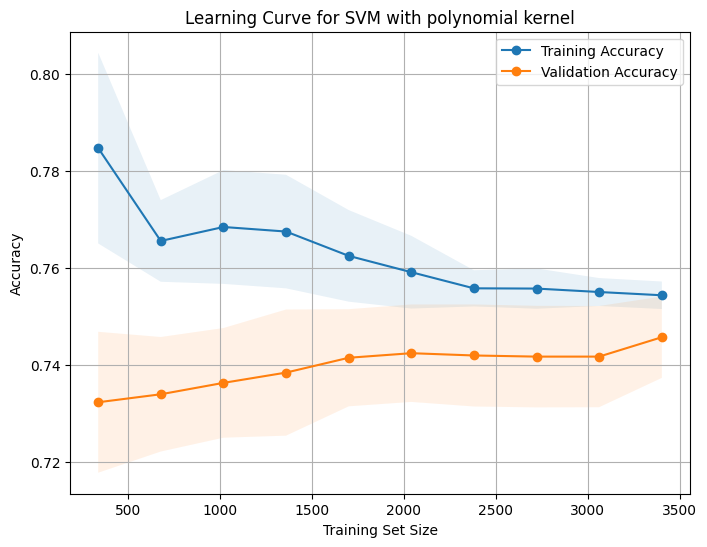

In [26]:
model.plot_learning_curve(search, X_train, y_train, title="Learning Curve for SVM with polynomial kernel")

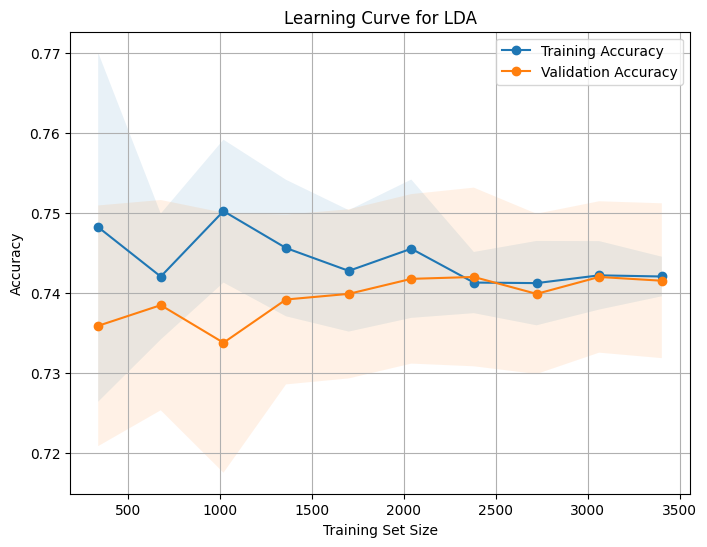

In [29]:
model.plot_learning_curve(lda_tuned, X_train, y_train, title="Learning Curve for LDA")

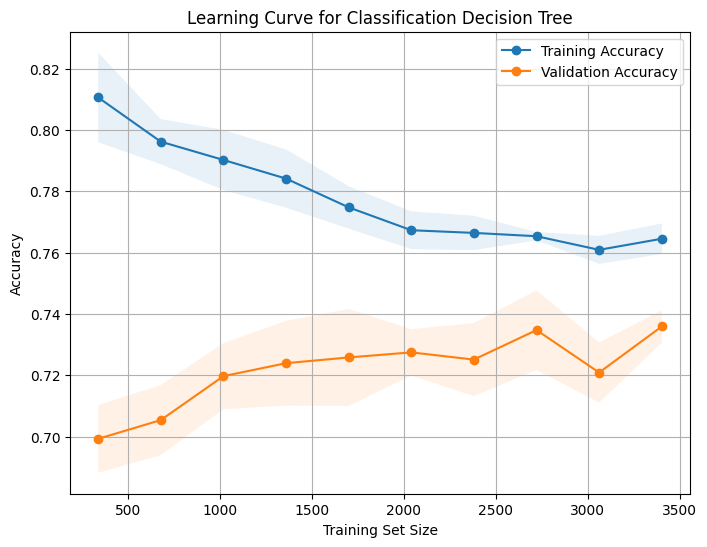

In [30]:
model.plot_learning_curve(tree, X_train, y_train, title="Learning Curve for Classification Decision Tree")

#### Analysis